<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=6px>
                    <b>
                        APPLICATION OF DATA SCIENCE TO REDUCE
 <br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="center" width=110%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=6px>
                    <b>
                        EMPLOYEE ATTRITION
 <br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="center" width=110%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=6px>
                    <b>
                        Part - B
 <br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, RocCurveDisplay, f1_score
from sklearn.metrics import accuracy_score
from scipy import stats

from sklearn.pipeline import Pipeline
from itertools import cycle
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, LabelBinarizer, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
import statsmodels
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,f1_score,accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor


# import function to perform feature selection
from sklearn.feature_selection import RFE, SequentialFeatureSelector

# change the size of the graphs
plt.rcParams['figure.figsize'] = [15,12]

In [2]:
pd.set_option('display.max_columns',100)

# Load Dataset

In [3]:
df_final = pd.read_csv('df_final.csv')

In [4]:
df_final.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
df_final.head(3)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EducationField_Test,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Employee_Source_Company Website,Employee_Source_GlassDoor,Employee_Source_Indeed,Employee_Source_Jora,Employee_Source_LinkedIn,Employee_Source_Recruit.net,Employee_Source_Referral,Employee_Source_Seek
0,5.846109,1,245.328002,0.698403,2.489792,2.527807,0,49.027914,6.137491,0.746814,5.881209,4.065872,1607.384643,2.029539,1,0.697659,0.034998,1.135308,0.000000,3.118973,0.000000,1.416107,2.167436,1.981769,0.000000,2.252602,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,5.846109,1,245.328002,0.698403,2.489792,2.527807,0,49.027914,6.137491,0.746814,5.881209,4.065872,1607.384643,1.518198,1,0.697659,0.034998,1.135308,0.000000,3.118973,0.000000,1.416107,2.167436,1.981769,0.000000,2.252602,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,5.846109,1,245.328002,0.698403,2.489792,2.527807,0,49.027914,6.137491,0.746814,5.881209,4.065872,1607.384643,2.029539,1,0.697659,0.034998,1.135308,0.000000,3.118973,0.000000,1.416107,2.167436,1.981769,0.000000,2.252602,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


# Statistical Model

### Statistical model is a mathematical model that is used to predict a continuous outcome based on one or more input variables. The goal of regression analysis is to find the statistical relationship between the input variables (also known as predictors or independent variables) and the output variable (also known as the response or dependent variable).

In [5]:
X=df_final.drop('Attrition',axis=1)
y=df_final['Attrition']

print('Independent Features :',X.shape)
print('Dependent Features :',y.shape)

Independent Features : (23186, 53)
Dependent Features : (23186,)


In [6]:
Xc = sm.add_constant(X)
model=sm.Logit(y,Xc).fit()
result=model.summary()
result

         Current function value: 0.373340
         Iterations: 35


C:\Users\91822\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                23186
Model:                          Logit   Df Residuals:                    23133
Method:                           MLE   Df Model:                           52
Date:                Tue, 14 Mar 2023   Pseudo R-squ.:                  0.1440
Time:                        07:59:42   Log-Likelihood:                -8656.3
converged:                      False   LL-Null:                       -10113.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.8670      0.040    -21.547      0.000      -0.946      -0.788
DailyRate                            -0.0022      0.000     -8.274      0.000      -0.003      -0.002
DistanceFromHome                      0.1994      0.025      7.898      0.000       0.150       0.249
Education                             0.0151      0.013      1.180      0.238      -0.010       0.040
EnvironmentSatisfaction              -0.1313      0.013    -10.134      0.000      -0.157      -0.106
Gender                                0.1065      0.040      2.634      0.008       0.027       0.186
HourlyRate                            0.0150      0.002      6.462      0.000       0.010       0.020
JobInvolvement                       -0.1078      0.010    -10.520      0.000      -0.128      -0.088
JobLevel                             -0.2398      0.365     -0.657      0.511      -0.956       0.476
JobSatisfaction                      -0.1087      0.011     -9.699      0.000      -0.131      -0.087
MonthlyIncome                        -1.0916      0.432     -2.525      0.012      -1.939      -0.244
MonthlyRate                         1.87e-05   4.15e-05      0.450      0.653   -6.27e-05       0.000
NumCompaniesWorked                    0.1371      0.037      3.743      0.000       0.065       0.209
OverTime                              0.9071      0.041     22.189      0.000       0.827       0.987
PercentSalaryHike                   -18.6649      4.415     -4.228      0.000     -27.318     -10.012
PerformanceRating                   609.7358    100.894      6.043      0.000     411.987     807.485
RelationshipSatisfaction             -0.0269      0.012     -2.211      0.027      -0.051      -0.003
StockOptionLevel                     -0.4427      0.079     -5.581      0.000      -0.598      -0.287
TotalWorkingYears                    -0.0014      0.026     -0.053      0.958      -0.053       0.050
TrainingTimesLastYear                -0.2025      0.025     -8.000      0.000      -0.252      -0.153
WorkLifeBalance                      -0.0412      0.009     -4.439      0.000      -0.059      -0.023
YearsAtCompany                        0.0769      0.053      1.445      0.148      -0.027       0.181
YearsInCurrentRole                   -0.2277      0.033     -6.889      0.000      -0.292      -0.163
YearsSinceLastPromotion               0.2730      0.051      5.401      0.000       0.174       0.372
YearsWithCurrManager                 -0.0230      0.033     -0.687      0.492      -0.089       0.043
BusinessTravel_Travel_Frequently      1.4342      0.089     16.081      0.000       1.259       1.609
BusinessTravel_Travel_Rarely          0.7139      0.084      8.535      0.000       0.550       0.878
Department_Research & Development    -0.3772      0.109     -3.470      0.001      -0.590      -0.164
Department_Sales                      0.1038      0.112      0.926      0.354  

## Train-Test Split

### Splitting the dataset into independent features 'X' and target variable 'y'

In [7]:
X=df_final.drop('Attrition',axis=1)
y=df_final['Attrition']

print('Independent Features :',X.shape)
print('Dependent Features :',y.shape)

Independent Features : (23186, 53)
Dependent Features : (23186,)


In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=0)

print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (16230, 53)
y_train (16230,)
X_test (6956, 53)
y_test (6956,)


## Data Scaling using standard scaler and Apply classifier

In [9]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('lr',LogisticRegression())])
pipeline_dt=Pipeline([('scaler2',StandardScaler()),
                     ('dt',DecisionTreeClassifier())])
pipeline_rf=Pipeline([('scalar3',StandardScaler()),
                     ('rfc',RandomForestClassifier())])
pipeline_knn=Pipeline([('scalar4',StandardScaler()),
                     ('knn',KNeighborsClassifier())])
pipeline_xgbc=Pipeline([('scalar5',StandardScaler()),
                     ('xgboost',XGBClassifier())])
pipeline_ada=Pipeline([('scalar7',StandardScaler()),
                     ('adaboost',AdaBoostClassifier())])
pipeline_nb=Pipeline([('scalar9',StandardScaler()),
                     ('nb',GaussianNB())])
pipeline_gbc=Pipeline([('scalar12',StandardScaler()),
                     ('GBC',GradientBoostingClassifier())])

In [10]:
pipelines=[pipeline_lr, pipeline_dt, pipeline_rf, pipeline_knn,
           pipeline_xgbc, pipeline_ada, pipeline_nb, pipeline_gbc]

In [11]:
pipe_dict={0:'Logistic Regression',
           1:'Decision Tree',
           2:'Random Forest Classifier',
           3:'K Neighbors Classifier',
           4:'XGBoost Classifier',
           5:'ADA Boost Classifier',
           6:'Gaussian Naive Base',
           7:'Gradient Boosting Classifier'}

## Balancing The Target Variable

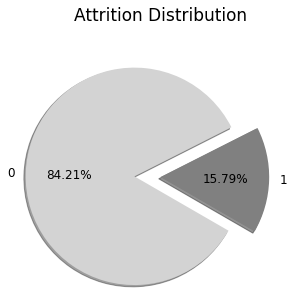

In [12]:
plt.figure(figsize=(4,4))
plt.pie((df_final['Attrition'].value_counts().values[1],df_final['Attrition'].value_counts()[0]),labels=df_final['Attrition'].unique(), 
        textprops = {"fontsize":12}, shadow=True, startangle=330, radius=1.25, autopct='%2.2f%%', explode=[0,0.3],
       colors=['grey','lightgrey'])
plt.title('Attrition Distribution\n\n', fontdict={'fontsize': 17})
plt.show()

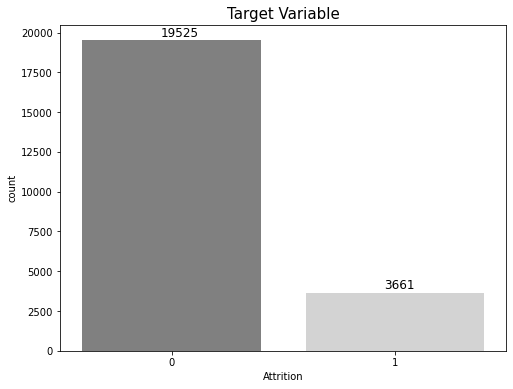

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(df_final['Attrition'],palette=['grey','lightgrey'])
plt.title('Target Variable', fontdict={'fontsize':15})
plt.text(x=-0.05, y=df_final['Attrition'].value_counts()[0]+250, s=df_final['Attrition'].value_counts()[0],
         fontdict={'size':'large'})
plt.text(x=0.95, y=df_final['Attrition'].value_counts().values[1]+250, 
         s=df_final['Attrition'].value_counts().values[1],fontdict={'size':'large'})
plt.show()

### As the dataset is highly imbalanced, we will use SMOTE to balance the Target Variable.

In [14]:
smote = SMOTE(sampling_strategy=0.7, random_state=42)

X_sm, y_sm = smote.fit_resample(X_train,y_train)

print('X_sm',X_sm.shape)
print('y_sm', y_sm.shape)

X_sm (23269, 53)
y_sm (23269,)


## With SMOTE - Base Model

## Logistic Regression

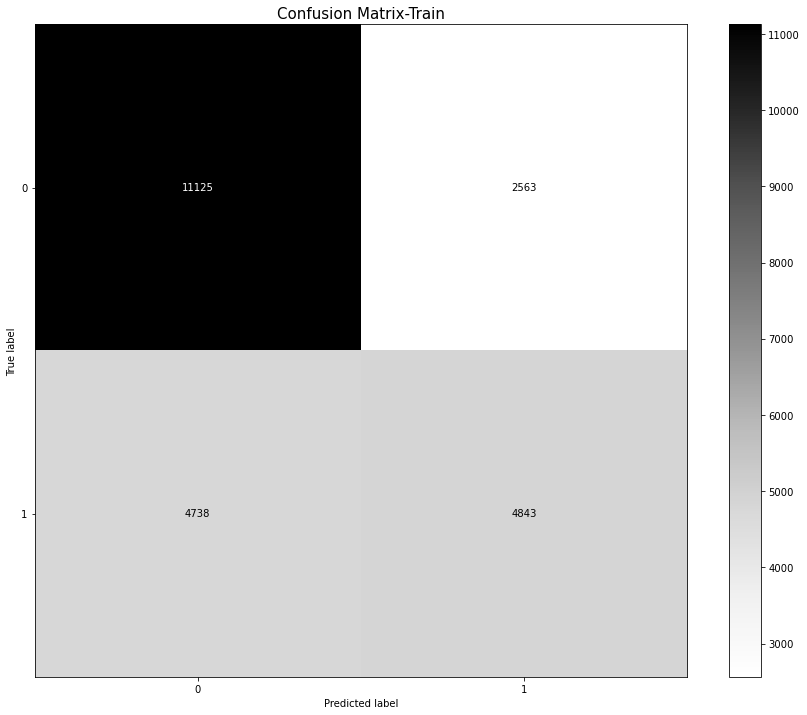


Accuracy Score-Train : 0.6862349048089733

Classification Report-Train
               precision    recall  f1-score   support

           0       0.70      0.81      0.75     13688
           1       0.65      0.51      0.57      9581

    accuracy                           0.69     23269
   macro avg       0.68      0.66      0.66     23269
weighted avg       0.68      0.69      0.68     23269


AUC Score-Train : 0.7297221738109061





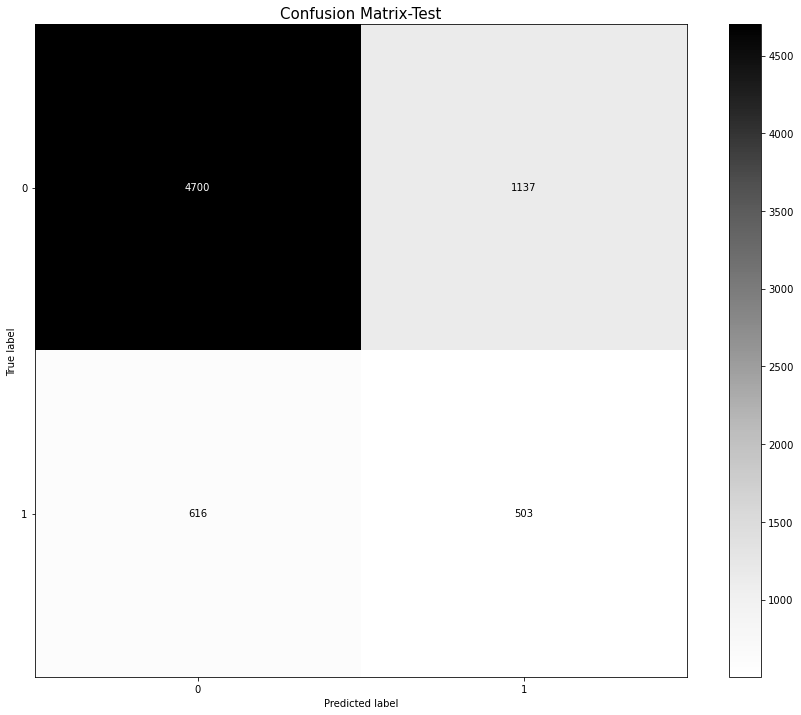


Accuracy Score-Test : 0.7479873490511788

Classification Report-Test
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      5837
           1       0.31      0.45      0.36      1119

    accuracy                           0.75      6956
   macro avg       0.60      0.63      0.60      6956
weighted avg       0.79      0.75      0.77      6956


AUC Score-Test : 0.7011540658548904



Plot : AUC-ROC Curve


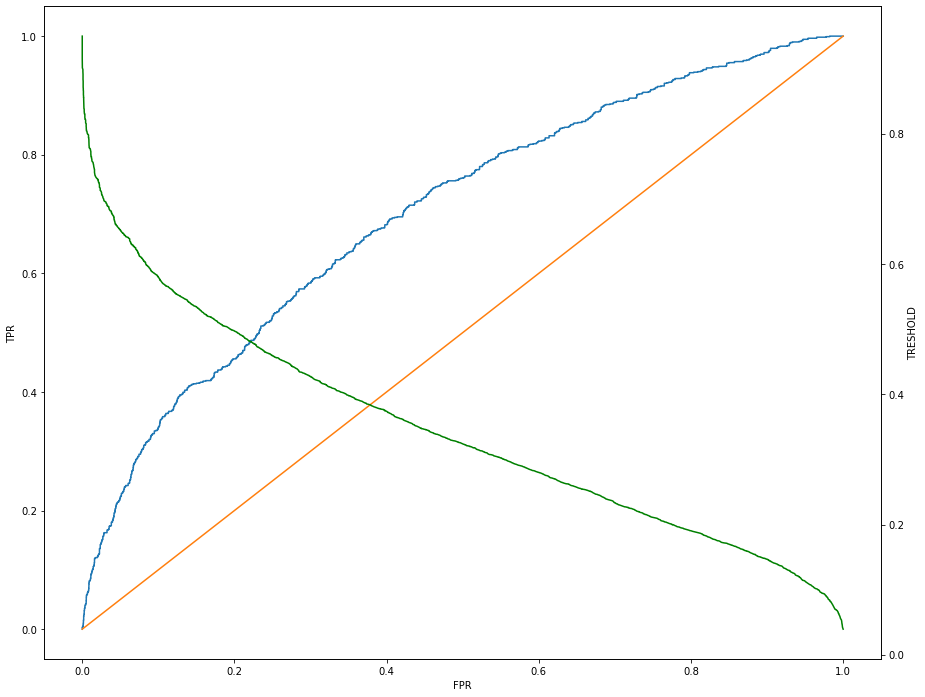

In [15]:
lr=LogisticRegression()
lr.fit(X_sm,y_sm)
y_train_pred=lr.predict(X_sm)
y_train_prob=lr.predict_proba(X_sm)[:,1]

y_test_pred=lr.predict(X_test)
y_test_prob=lr.predict_proba(X_test)[:,1]


ConfusionMatrixDisplay.from_predictions(y_sm,y_train_pred,cmap='Greys')
plt.title('Confusion Matrix-Train',fontdict={'fontsize':15})
plt.show()
print('\nAccuracy Score-Train :',accuracy_score(y_sm,y_train_pred))
print('\nClassification Report-Train\n',classification_report(y_sm,y_train_pred))
print('\nAUC Score-Train :',roc_auc_score(y_sm,y_train_prob))
print('\n'*2)
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,cmap='Greys')
plt.title('Confusion Matrix-Test',fontdict={'fontsize':15})
plt.show()
print('\nAccuracy Score-Test :',accuracy_score(y_test,y_test_pred))
print('\nClassification Report-Test\n',classification_report(y_test,y_test_pred))
print('\nAUC Score-Test :',roc_auc_score(y_test,y_test_prob))

print('\n\n\nPlot : AUC-ROC Curve')
fpr,tpr,threshold= roc_curve(y_test,y_test_prob)
threshold[0]=threshold[0]-1

fig,ax1 = plt.subplots()
ax1.plot(fpr,tpr)
ax1.plot(fpr,fpr)
ax1.set_xlabel('FPR')
ax1.set_ylabel('TPR')
ax2=ax1.twinx()
ax2.plot(fpr,threshold,'-g')
ax2.set_ylabel('TRESHOLD')
plt.show()
plt.show()

## Without SMOTE-Base Model

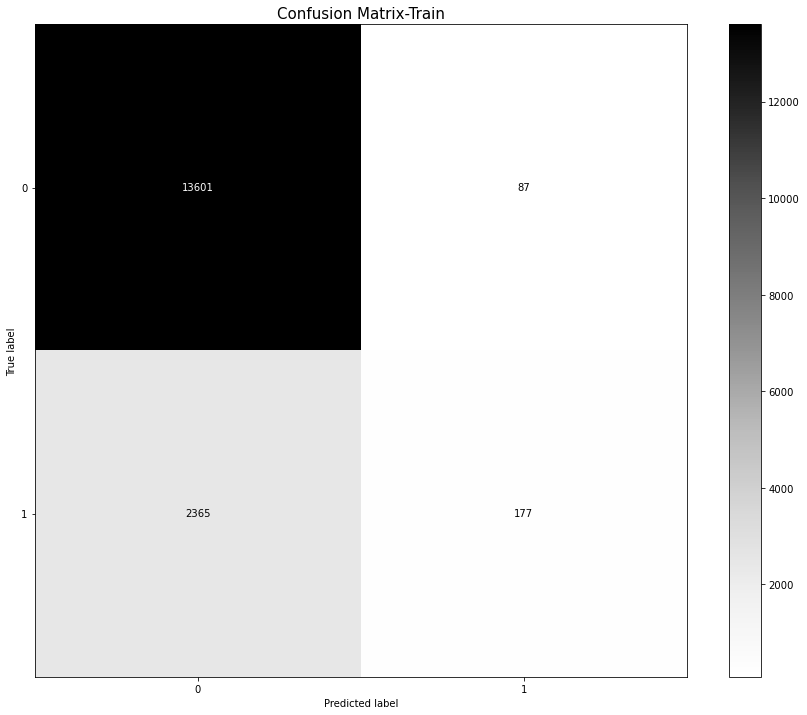

Accuracy Score-Train : 0.8489217498459642

Classification Report-Train
               precision    recall  f1-score   support

           0       0.85      0.99      0.92     13688
           1       0.67      0.07      0.13      2542

    accuracy                           0.85     16230
   macro avg       0.76      0.53      0.52     16230
weighted avg       0.82      0.85      0.79     16230


AUC Score-Train : 0.7251850673730997





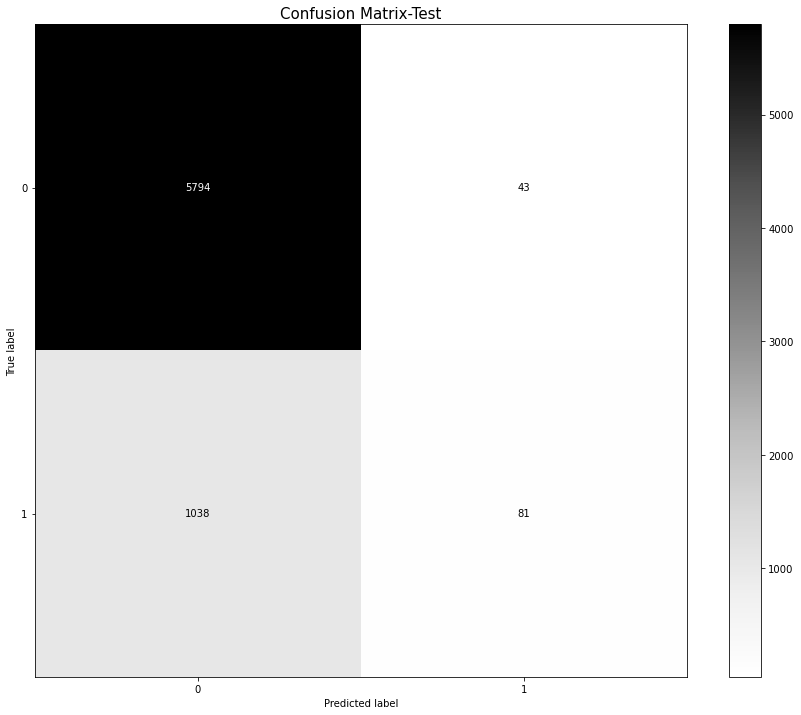

Accuracy Score-Test : 0.8445945945945946

Classification Report-Test
               precision    recall  f1-score   support

           0       0.85      0.99      0.91      5837
           1       0.65      0.07      0.13      1119

    accuracy                           0.84      6956
   macro avg       0.75      0.53      0.52      6956
weighted avg       0.82      0.84      0.79      6956


AUC Score-Test : 0.7224088788005028




Plot : AUC-ROC Curve


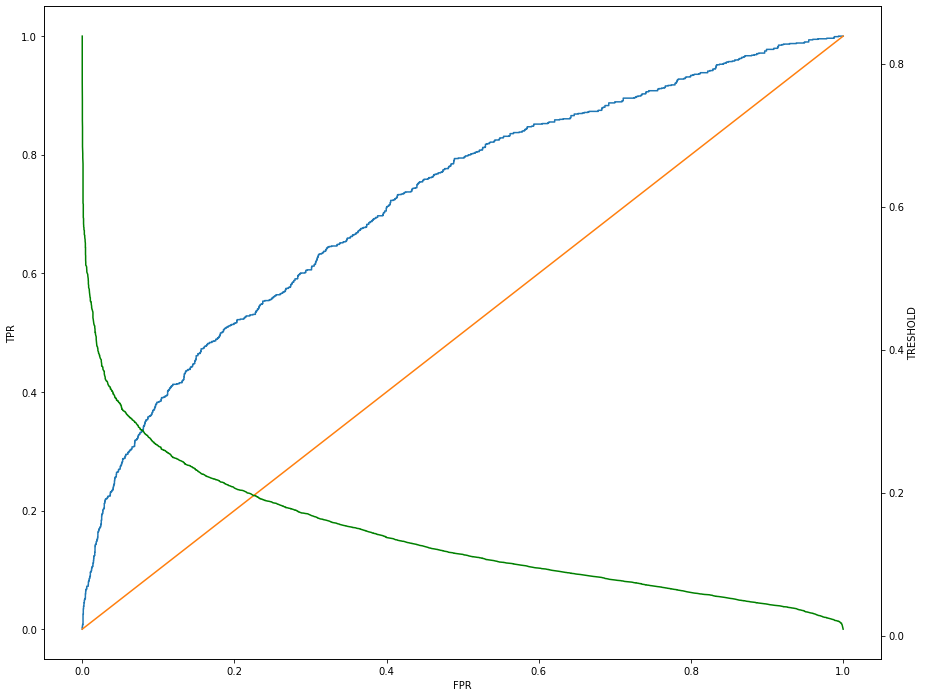

In [16]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)
y_train_prob=lr.predict_proba(X_train)[:,1]

y_test_pred=lr.predict(X_test)
y_test_prob=lr.predict_proba(X_test)[:,1]


ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,cmap='Greys')
plt.title('Confusion Matrix-Train',fontdict={'fontsize':15})
plt.show()
print('Accuracy Score-Train :',accuracy_score(y_train,y_train_pred))
print('\nClassification Report-Train\n',classification_report(y_train,y_train_pred))
print('\nAUC Score-Train :',roc_auc_score(y_train,y_train_prob))
print('\n'*2)


ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,cmap='Greys')
plt.title('Confusion Matrix-Test',fontdict={'fontsize':15})
plt.show()
print('Accuracy Score-Test :',accuracy_score(y_test,y_test_pred))
print('\nClassification Report-Test\n',classification_report(y_test,y_test_pred))
print('\nAUC Score-Test :',roc_auc_score(y_test,y_test_prob))
print('\n'*3)
print('Plot : AUC-ROC Curve')
fpr,tpr,threshold= roc_curve(y_test,y_test_prob)
threshold[0]=threshold[0]-1
fig,ax1 = plt.subplots()
ax1.plot(fpr,tpr)
ax1.plot(fpr,fpr)
ax1.set_xlabel('FPR')
ax1.set_ylabel('TPR')
ax2=ax1.twinx()
ax2.plot(fpr,threshold,'-g')
ax2.set_ylabel('TRESHOLD')
plt.show()
plt.show()

## Comparing Models ROC-AUC Curve

In [17]:
# logistic regression
model1 = LogisticRegression()

# knn
model2 = KNeighborsClassifier()

# Random Forest Classifier
model3 = RandomForestClassifier()

# XGBClassifier
model4=XGBClassifier()

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

# predicted values
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)
pred_prob4 = model4.predict_proba(X_test)

In [18]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [19]:
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])

# accuracy score
accuracy1 = accuracy_score(y_test,y_pred1)
accuracy2 = accuracy_score(y_test,y_pred2)
accuracy3 = accuracy_score(y_test,y_pred3)
accuracy4 = accuracy_score(y_test,y_pred4)

# f1_score
f1_score1 = f1_score(y_test,y_pred1)
f1_score2 = f1_score(y_test,y_pred2)
f1_score3 = f1_score(y_test,y_pred3)
f1_score4 = f1_score(y_test,y_pred4)

# precision score
precision1 = precision_score(y_test,y_pred1)
precision2 = precision_score(y_test,y_pred2)
precision3 = precision_score(y_test,y_pred3)
precision4 = precision_score(y_test,y_pred4)

# recall score
recall1 = recall_score(y_test,y_pred1)
recall2 = recall_score(y_test,y_pred2)
recall3 = recall_score(y_test,y_pred3)
recall4 = recall_score(y_test,y_pred4)

pd.DataFrame({'Classifier':['LogisticRegression','KNeighborsClassifier','RandomForestClassifier','XGBClassifier'],
              'AUC_Score':[auc_score1,auc_score2,auc_score3,auc_score4],
              'Accuracy' :[accuracy1,accuracy2,accuracy3,accuracy4],
              'f1_score': [f1_score1,f1_score2,f1_score3,f1_score4],
              'Precision': [precision1,precision2,precision3,precision4],
              'Recall' :[recall1,recall2,recall3,recall4]})

,Classifier,AUC_Score,Accuracy,f1_score,Precision,Recall
0,LogisticRegression,0.722409,0.844595,0.130330,0.653226,0.072386
1,KNeighborsClassifier,0.965372,0.954284,0.849574,0.902513,0.802502
2,RandomForestClassifier,0.999918,0.997269,0.991461,0.997288,0.985702
3,XGBClassifier,0.999690,0.998706,0.995966,0.999101,0.992851


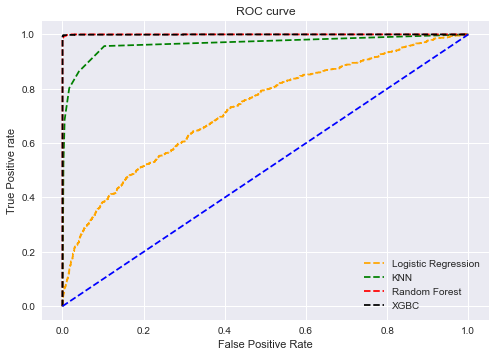

In [20]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Random Forest')
plt.plot(fpr4, tpr4, linestyle='--',color='black', label='XGBC')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## Multiple Base Model Performance

In [21]:
for i in pipelines:
    i.fit(X_sm,y_sm)
    y_pred=i.predict(X_test)
    print('\nClassification Report :', i[1] ,'\n',(classification_report(y_test,y_pred)))
    print('f1-score :',(f1_score(y_test,y_pred)))
    print('\n'*2,'------------------------------------------------------------------------------------------------')


Classification Report : LogisticRegression() 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      5837
           1       0.39      0.39      0.39      1119

    accuracy                           0.80      6956
   macro avg       0.64      0.64      0.64      6956
weighted avg       0.80      0.80      0.80      6956

f1-score : 0.3907225691347012


 ------------------------------------------------------------------------------------------------

Classification Report : DecisionTreeClassifier() 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5837
           1       0.98      0.98      0.98      1119

    accuracy                           0.99      6956
   macro avg       0.99      0.99      0.99      6956
weighted avg       0.99      0.99      0.99      6956

f1-score : 0.9790832220738762


 -----------------------------------------------------------------------------------

### Base model with best f1-score : XGBClassifier - 99.24%

## KNN

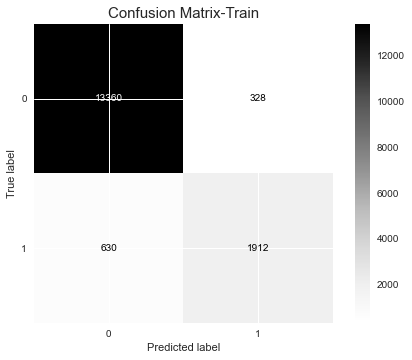


Classification Report-Train :
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     13688
           1       0.85      0.75      0.80      2542

    accuracy                           0.94     16230
   macro avg       0.90      0.86      0.88     16230
weighted avg       0.94      0.94      0.94     16230


Accuracy Score-Train : 0.9409735058533579

AUC Score-Train : 0.9713668062120375

f1_Score-Train : 0.7996654119615224





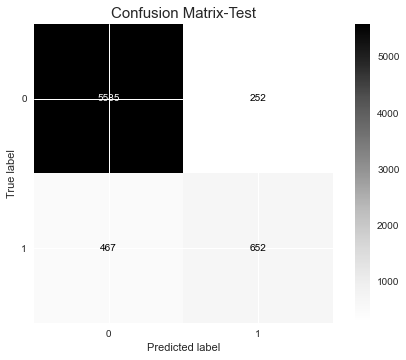


Classification Report-Test :
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      5837
           1       0.72      0.58      0.64      1119

    accuracy                           0.90      6956
   macro avg       0.82      0.77      0.79      6956
weighted avg       0.89      0.90      0.89      6956


Accuracy Score-Test : 0.8966359976998275

AUC Score-Test : 0.9192371306094385

f1_Score-Test : 0.6445872466633713




Plot : AUC-ROC Curve


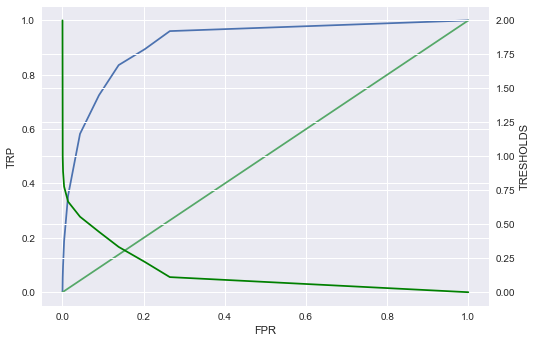

In [22]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
y_train_pred=knn.predict(X_train)
y_train_prob=knn.predict_proba(X_train)[:,1]

y_test_pred=knn.predict(X_test)
y_test_prob=knn.predict_proba(X_test)[:,1]


ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,cmap='Greys')
plt.title('Confusion Matrix-Train',fontdict={'fontsize':15})
plt.show()
print('\nClassification Report-Train :\n',classification_report(y_train,y_train_pred))
print('\nAccuracy Score-Train :',accuracy_score(y_train,y_train_pred))
print('\nAUC Score-Train :',roc_auc_score(y_train,y_train_prob))
print('\nf1_Score-Train :',f1_score(y_train,y_train_pred))

print('\n'*2)

ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,cmap='Greys')
plt.title('Confusion Matrix-Test',fontdict={'fontsize':15})
plt.show()
print('\nClassification Report-Test :\n',classification_report(y_test,y_test_pred))
print('\nAccuracy Score-Test :',accuracy_score(y_test,y_test_pred))
print('\nAUC Score-Test :',roc_auc_score(y_test,y_test_prob))
print('\nf1_Score-Test :',f1_score(y_test,y_test_pred))

print('\n'*3)

print('Plot : AUC-ROC Curve')
fpr,tpr,thresholds= roc_curve(y_test,y_test_prob)
fig,ax1 = plt.subplots()
ax1.plot(fpr,tpr)
ax1.plot(fpr,fpr)
ax1.set_xlabel('FPR')
ax1.set_ylabel('TRP')
ax2=ax1.twinx()
ax2.plot(fpr,thresholds,'-g')
ax2.set_ylabel('TRESHOLDS')
plt.show()
plt.show()

## Decision Tree Classifier

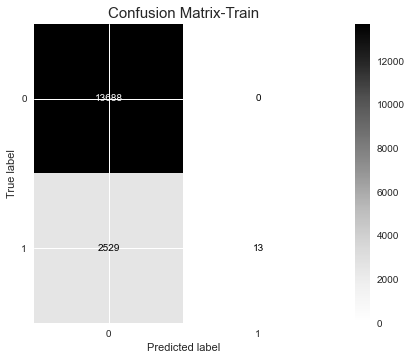


Classification Report-Train :
               precision    recall  f1-score   support

           0       0.84      1.00      0.92     13688
           1       1.00      0.01      0.01      2542

    accuracy                           0.84     16230
   macro avg       0.92      0.50      0.46     16230
weighted avg       0.87      0.84      0.77     16230


Accuracy Score-Train : 0.844177449168207

AUC Score-Train : 0.6518715561040909





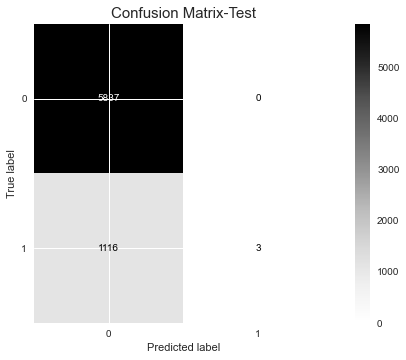


Classification Report-Test :
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      5837
           1       1.00      0.00      0.01      1119

    accuracy                           0.84      6956
   macro avg       0.92      0.50      0.46      6956
weighted avg       0.87      0.84      0.77      6956


Accuracy Score-Test : 0.8395629672225416

AUC Score-Test : 0.6533911353767214



Plot : AUC-ROC Curve


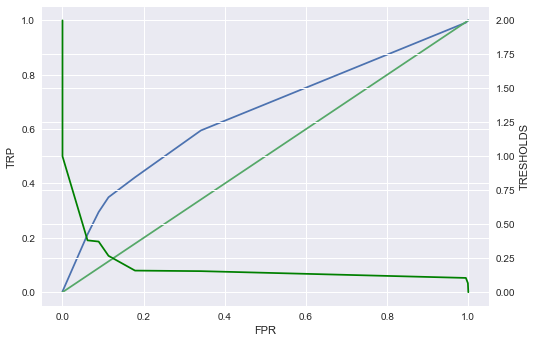

In [23]:
dt=DecisionTreeClassifier(criterion = 'gini', max_depth = 4, max_features= 'log2',
                           min_samples_split = 2, max_leaf_nodes = 9, random_state = 10)
dt.fit(X_train,y_train)
y_train_pred=dt.predict(X_train)
y_train_prob=dt.predict_proba(X_train)[:,1]

y_test_pred=dt.predict(X_test)
y_test_prob=dt.predict_proba(X_test)[:,1]


ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,cmap='Greys')
plt.title('Confusion Matrix-Train',fontdict={'fontsize':15})
plt.show()
print('\nClassification Report-Train :\n',classification_report(y_train,y_train_pred))
print('\nAccuracy Score-Train :',accuracy_score(y_train,y_train_pred))
print('\nAUC Score-Train :',roc_auc_score(y_train,y_train_prob))

print('\n'*2)

ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,cmap='Greys')
plt.title('Confusion Matrix-Test',fontdict={'fontsize':15})
plt.show()
print('\nClassification Report-Test :\n',classification_report(y_test,y_test_pred))
print('\nAccuracy Score-Test :',accuracy_score(y_test,y_test_pred))
print('\nAUC Score-Test :',roc_auc_score(y_test,y_test_prob))


print('\n\n\nPlot : AUC-ROC Curve')
fpr,tpr,thresholds= roc_curve(y_test,y_test_prob)
fig,ax1 = plt.subplots()
ax1.plot(fpr,tpr)
ax1.plot(fpr,fpr)
ax1.set_xlabel('FPR')
ax1.set_ylabel('TRP')
ax2=ax1.twinx()
ax2.plot(fpr,thresholds,'-g')
ax2.set_ylabel('TRESHOLDS')
plt.show()
plt.show()

## Random Forest Classifier

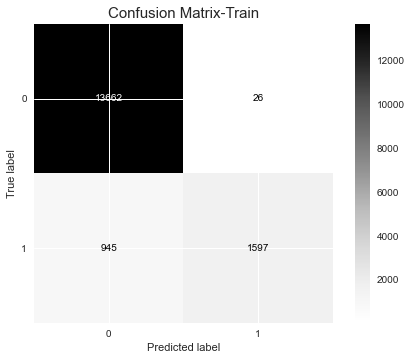


Classification Report-Train :
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     13688
           1       0.98      0.63      0.77      2542

    accuracy                           0.94     16230
   macro avg       0.96      0.81      0.87     16230
weighted avg       0.94      0.94      0.93     16230


Accuracy Score-Train : 0.9401725200246457

AUC Score-Train : 0.9912085238018817





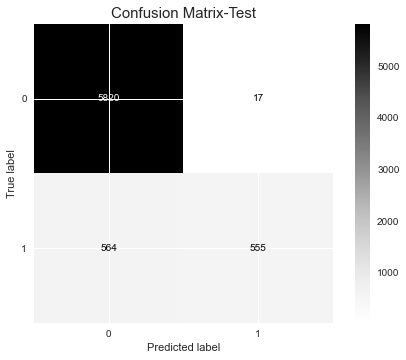


Classification Report-Test :
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      5837
           1       0.97      0.50      0.66      1119

    accuracy                           0.92      6956
   macro avg       0.94      0.75      0.80      6956
weighted avg       0.92      0.92      0.90      6956


Accuracy Score-Test : 0.9164749856239218

AUC Score-Test : 0.9710639179999152



Plot : AUC-ROC Curve


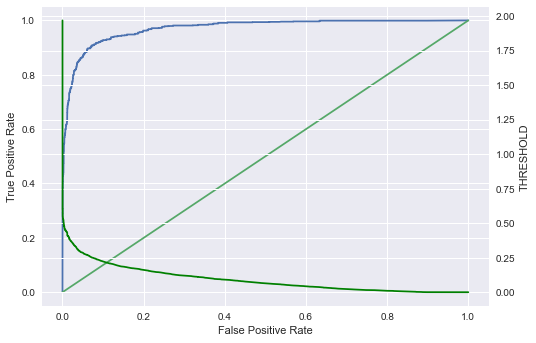

In [24]:
rf=RandomForestClassifier(max_depth=15, min_samples_leaf=10, min_samples_split=20,
                       n_estimators=5)
rf.fit(X_train,y_train)
y_train_pred=rf.predict(X_train)
y_train_prob=rf.predict_proba(X_train)[:,1]

y_test_pred=rf.predict(X_test)
y_test_prob=rf.predict_proba(X_test)[:,1]

ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,cmap='Greys')
plt.title('Confusion Matrix-Train',fontdict={'fontsize':15})
plt.show()
print('\nClassification Report-Train :\n',classification_report(y_train,y_train_pred))
print('\nAccuracy Score-Train :',accuracy_score(y_train,y_train_pred))
print('\nAUC Score-Train :',roc_auc_score(y_train,y_train_prob))

print('\n'*2)

ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,cmap='Greys')
plt.title('Confusion Matrix-Test',fontdict={'fontsize':15})
plt.show()
print('\nClassification Report-Test :\n',classification_report(y_test,y_test_pred))
print('\nAccuracy Score-Test :',accuracy_score(y_test,y_test_pred))
print('\nAUC Score-Test :',roc_auc_score(y_test,y_test_prob))

print('\n\n\nPlot : AUC-ROC Curve')
fpr,tpr,thresholds= roc_curve(y_test,y_test_prob)
fig,ax1 = plt.subplots()
ax1.plot(fpr,tpr)
ax1.plot(fpr,fpr)
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax2=ax1.twinx()
ax2.plot(fpr,thresholds,'-g')
ax2.set_ylabel('THRESHOLD')
plt.show()
plt.show()

## XGBClassifier

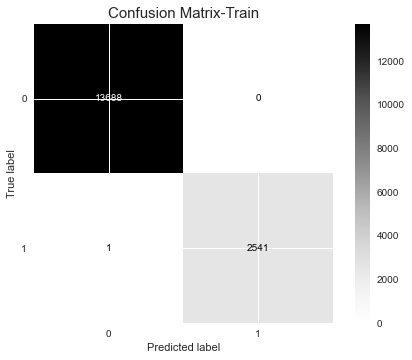


Classification Report-Train :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13688
           1       1.00      1.00      1.00      2542

    accuracy                           1.00     16230
   macro avg       1.00      1.00      1.00     16230
weighted avg       1.00      1.00      1.00     16230


Accuracy Score-Train : 0.9999383857054837

AUC Score-Train : 1.0





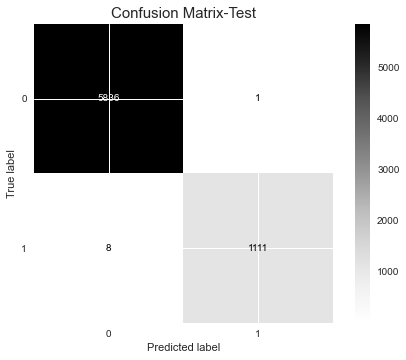


Classification Report-Test :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5837
           1       1.00      0.99      1.00      1119

    accuracy                           1.00      6956
   macro avg       1.00      1.00      1.00      6956
weighted avg       1.00      1.00      1.00      6956


Accuracy Score-Test : 0.9987061529614721

AUC Score-Test : 0.999690122011396



Plot : AUC-ROC Curve


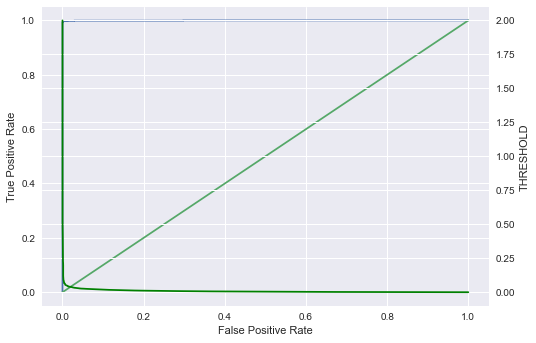

In [25]:
xgbc=XGBClassifier()
xgbc.fit(X_train,y_train)
y_train_pred=xgbc.predict(X_train)
y_train_prob=xgbc.predict_proba(X_train)[:,1]

y_test_pred=xgbc.predict(X_test)
y_test_prob=xgbc.predict_proba(X_test)[:,1]

ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,cmap='Greys')
plt.title('Confusion Matrix-Train',fontdict={'fontsize':15})
plt.show()
print('\nClassification Report-Train :\n',classification_report(y_train,y_train_pred))
print('\nAccuracy Score-Train :',accuracy_score(y_train,y_train_pred))
print('\nAUC Score-Train :',roc_auc_score(y_train,y_train_prob))

print('\n'*2)

ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,cmap='Greys')
plt.title('Confusion Matrix-Test',fontdict={'fontsize':15})
plt.show()
print('\nClassification Report-Test :\n',classification_report(y_test,y_test_pred))
print('\nAccuracy Score-Test :',accuracy_score(y_test,y_test_pred))
print('\nAUC Score-Test :',roc_auc_score(y_test,y_test_prob))


print('\n\n\nPlot : AUC-ROC Curve')
fpr,tpr,thresholds= roc_curve(y_test,y_test_prob)
fig,ax1 = plt.subplots()
ax1.plot(fpr,tpr)
ax1.plot(fpr,fpr)
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax2=ax1.twinx()
ax2.plot(fpr,thresholds,'-g')
ax2.set_ylabel('THRESHOLD')
plt.show()
plt.show()

## Feature Importance using different classifiers

In [26]:
pipeline=[DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier()]

DecisionTreeClassifier()


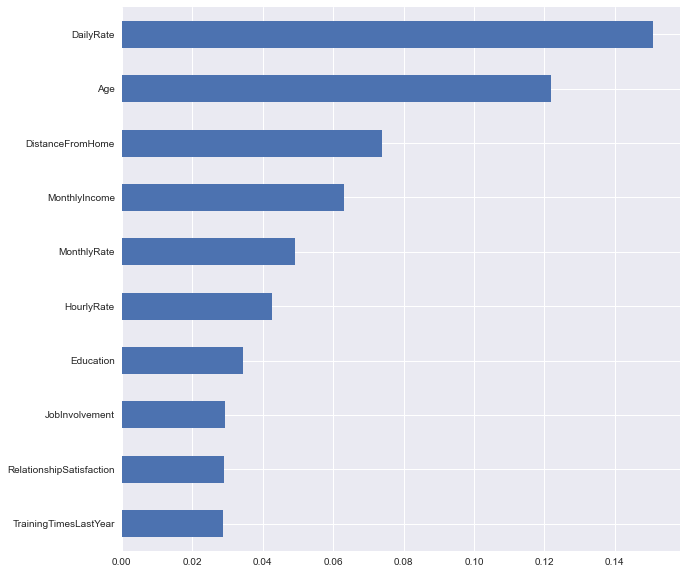

RandomForestClassifier()


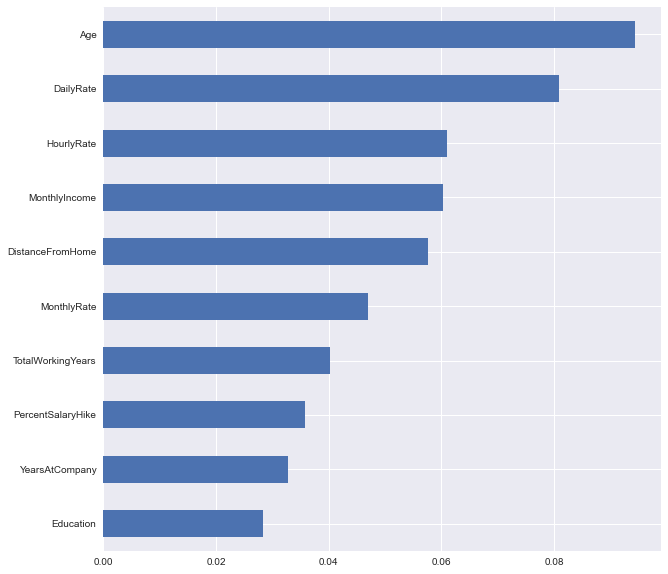

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)


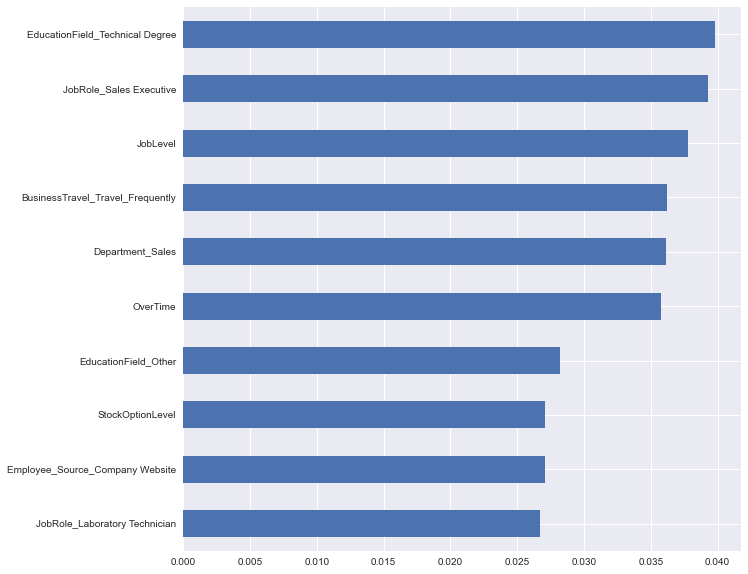

In [27]:
for i in pipeline:
    i.fit(X,y)
    i.feature_importances_
    print(i)
    imp_features = pd.Series(i.feature_importances_,index=X.columns)
    plt.figure(figsize =(10,10))
    imp_features.nlargest(10).sort_values(ascending=True).plot(kind='barh')

    plt.show()

In [28]:
a=[]
for i in pipeline:
    i.fit(X,y)
    i.feature_importances_
    imp_features = pd.Series(i.feature_importances_,index=X.columns)
    x = pd.DataFrame(imp_features.nlargest(10).sort_values(ascending=False))
    a.append(x.index.values)
    b=pd.DataFrame(a)
c=b.T
c.rename(columns={0:'DecisionTreeClassifier',1:'RandomForestClassifier',2:'XGBClassifier'}, inplace=True)
c

,DecisionTreeClassifier,RandomForestClassifier,XGBClassifier
0,DailyRate,Age,EducationField_Technical Degree
1,Age,DailyRate,JobRole_Sales Executive
2,DistanceFromHome,HourlyRate,JobLevel
3,MonthlyIncome,MonthlyIncome,BusinessTravel_Travel_Frequently
4,MonthlyRate,DistanceFromHome,Department_Sales
5,HourlyRate,MonthlyRate,OverTime
6,TrainingTimesLastYear,TotalWorkingYears,EducationField_Other
7,TotalWorkingYears,PercentSalaryHike,StockOptionLevel
8,Education,YearsAtCompany,Employee_Source_Company Website
9,PercentSalaryHike,YearsWithCurrManager,JobRole_Laboratory Technician


In [29]:
d=pd.DataFrame()
for i in c.columns:
    d=pd.concat([d,c[i]],ignore_index=True)
d

,0
0,DailyRate
1,Age
2,DistanceFromHome
3,MonthlyIncome
4,MonthlyRate
5,HourlyRate
6,TrainingTimesLastYear
7,TotalWorkingYears
8,Education
9,PercentSalaryHike


In [30]:
d[0].unique()

array(['DailyRate', 'Age', 'DistanceFromHome', 'MonthlyIncome',
       'MonthlyRate', 'HourlyRate', 'TrainingTimesLastYear',
       'TotalWorkingYears', 'Education', 'PercentSalaryHike',
       'YearsAtCompany', 'YearsWithCurrManager',
       'EducationField_Technical Degree', 'JobRole_Sales Executive',
       'JobLevel', 'BusinessTravel_Travel_Frequently', 'Department_Sales',
       'OverTime', 'EducationField_Other', 'StockOptionLevel',
       'Employee_Source_Company Website', 'JobRole_Laboratory Technician'],
      dtype=object)

In [31]:
df_final.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EducationField_Test,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Employee_Source_Company Website,Employee_Source_GlassDoor,Employee_Source_Indeed,Employee_Source_Jora,Employee_Source_LinkedIn,Employee_Source_Recruit.net,Employee_Source_Referral,Employee_Source_Seek
0,5.846109,1,245.328002,0.698403,2.489792,2.527807,0,49.027914,6.137491,0.746814,5.881209,4.065872,1607.384643,2.029539,1,0.697659,0.034998,1.135308,0.000000,3.118973,0.000000,1.416107,2.167436,1.981769,0.000000,2.252602,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,5.846109,1,245.328002,0.698403,2.489792,2.527807,0,49.027914,6.137491,0.746814,5.881209,4.065872,1607.384643,1.518198,1,0.697659,0.034998,1.135308,0.000000,3.118973,0.000000,1.416107,2.167436,1.981769,0.000000,2.252602,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,5.846109,1,245.328002,0.698403,2.489792,2.527807,0,49.027914,6.137491,0.746814,5.881209,4.065872,1607.384643,2.029539,1,0.697659,0.034998,1.135308,0.000000,3.118973,0.000000,1.416107,2.167436,1.981769,0.000000,2.252602,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
3,5.846109,1,245.328002,0.698403,2.489792,2.527807,0,49.027914,6.137491,0.746814,5.881209,4.065872,1607.384643,1.518198,1,0.697659,0.034998,1.135308,0.000000,3.118973,0.000000,1.416107,2.167436,1.981769,0.000000,2.252602,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,5.846109,1,245.328002,0.698403,2.489792,2.527807,0,49.027914,6.137491,0.746814,5.881209,4.065872,1607.384643,2.029539,1,0.697659,0.034998,1.135308,0.000000,3.118973,0.000000,1.416107,2.167436,1.981769,0.000000,2.252602,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [32]:
X_new = df_final[['DailyRate', 'Age', 'DistanceFromHome', 'MonthlyIncome',
       'MonthlyRate', 'Education', 'HourlyRate', 'TrainingTimesLastYear',
       'PercentSalaryHike', 'YearsInCurrentRole', 'TotalWorkingYears',
       'YearsAtCompany', 'EducationField_Technical Degree',
       'JobRole_Sales Executive', 'JobLevel',
       'BusinessTravel_Travel_Frequently', 'Department_Sales', 'OverTime',
       'EducationField_Other', 'StockOptionLevel',
       'Employee_Source_Company Website', 'JobRole_Laboratory Technician']]
X_new.head()

,DailyRate,Age,DistanceFromHome,MonthlyIncome,MonthlyRate,Education,HourlyRate,TrainingTimesLastYear,PercentSalaryHike,YearsInCurrentRole,TotalWorkingYears,YearsAtCompany,EducationField_Technical Degree,JobRole_Sales Executive,JobLevel,BusinessTravel_Travel_Frequently,Department_Sales,OverTime,EducationField_Other,StockOptionLevel,Employee_Source_Company Website,JobRole_Laboratory Technician
0,245.328002,5.846109,0.698403,4.065872,1607.384643,2.489792,49.027914,0.000000,0.697659,1.981769,3.118973,2.167436,0,1,0.746814,0,1,1,0,0.000000,0,0
1,245.328002,5.846109,0.698403,4.065872,1607.384643,2.489792,49.027914,0.000000,0.697659,1.981769,3.118973,2.167436,0,1,0.746814,0,1,1,0,0.000000,0,0
2,245.328002,5.846109,0.698403,4.065872,1607.384643,2.489792,49.027914,0.000000,0.697659,1.981769,3.118973,2.167436,0,1,0.746814,0,1,1,0,0.000000,0,0
3,245.328002,5.846109,0.698403,4.065872,1607.384643,2.489792,49.027914,0.000000,0.697659,1.981769,3.118973,2.167436,0,1,0.746814,0,1,1,0,0.000000,0,0
4,245.328002,5.846109,0.698403,4.065872,1607.384643,2.489792,49.027914,0.000000,0.697659,1.981769,3.118973,2.167436,0,1,0.746814,0,1,1,0,0.000000,0,0


In [33]:
y_new = df_final[['Attrition']]
y_new.head()

,Attrition
0,1
1,1
2,1
3,1
4,1


## Model with Optimal Features 

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new, test_size=0.3, random_state=0)

print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (16230, 22)
y_train (16230, 1)
X_test (6956, 22)
y_test (6956, 1)


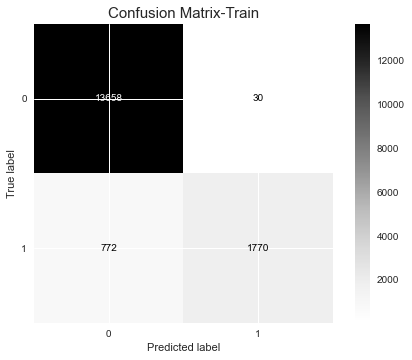


Classification Report-Train :
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     13688
           1       0.98      0.70      0.82      2542

    accuracy                           0.95     16230
   macro avg       0.96      0.85      0.89     16230
weighted avg       0.95      0.95      0.95     16230


Accuracy Score-Train : 0.9505853357979052

AUC Score-Train : 0.9899162221953473

f1_Score-Train : 0.8152924919391985





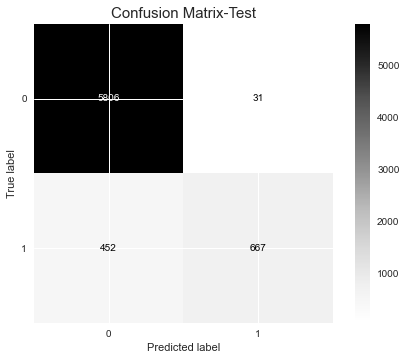


Classification Report-Test :
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5837
           1       0.96      0.60      0.73      1119

    accuracy                           0.93      6956
   macro avg       0.94      0.80      0.85      6956
weighted avg       0.93      0.93      0.92      6956


Accuracy Score-Test : 0.93056354226567

AUC Score-Test : 0.9744926322068257

f1_Score-Test : 0.7341772151898733



Plot : AUC-ROC Curve


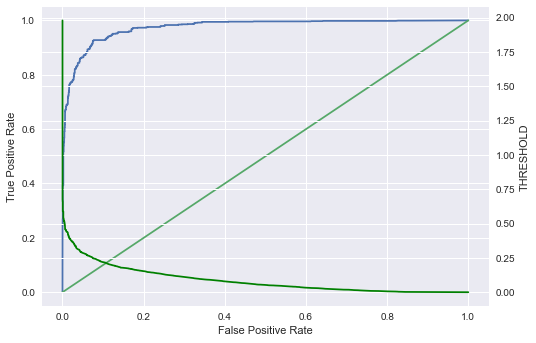

In [35]:
rf=RandomForestClassifier(max_depth=15, min_samples_leaf=10, min_samples_split=20,
                       n_estimators=5,random_state=10)
rf.fit(X_train,y_train)
y_train_pred=rf.predict(X_train)
y_train_prob=rf.predict_proba(X_train)[:,1]

y_test_pred=rf.predict(X_test)
y_test_prob=rf.predict_proba(X_test)[:,1]

ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,cmap='Greys')
plt.title('Confusion Matrix-Train',fontdict={'fontsize':15})
plt.show()
print('\nClassification Report-Train :\n',classification_report(y_train,y_train_pred))
print('\nAccuracy Score-Train :',accuracy_score(y_train,y_train_pred))
print('\nAUC Score-Train :',roc_auc_score(y_train,y_train_prob))
print('\nf1_Score-Train :',f1_score(y_train,y_train_pred))

print('\n'*2)

ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,cmap='Greys')
plt.title('Confusion Matrix-Test',fontdict={'fontsize':15})
plt.show()
print('\nClassification Report-Test :\n',classification_report(y_test,y_test_pred))
print('\nAccuracy Score-Test :',accuracy_score(y_test,y_test_pred))
print('\nAUC Score-Test :',roc_auc_score(y_test,y_test_prob))
print('\nf1_Score-Test :',f1_score(y_test,y_test_pred))

print('\n\n\nPlot : AUC-ROC Curve')
fpr,tpr,thresholds= roc_curve(y_test,y_test_prob)
fig,ax1 = plt.subplots()
ax1.plot(fpr,tpr)
ax1.plot(fpr,fpr)
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax2=ax1.twinx()
ax2.plot(fpr,thresholds,'-g')
ax2.set_ylabel('THRESHOLD')
plt.show()
plt.show()

## GridSearchCV

In [36]:
rfgrid=GridSearchCV(estimator=RandomForestClassifier(random_state=10),
                   param_grid=[{'criterion': ['entropy', 'gini'],
                                'n_estimators': [5,10],
                                'max_depth':[5,10,15],
                                'max_features': ['sqrt', 'log2'],
                                'min_samples_leaf':[10,50,100],
                                'min_samples_split': [20,100,200],
                                'max_leaf_nodes': [5, 8]}],
                   cv=5)

rfgrid_fit=rfgrid.fit(X_train,y_train)

print(rfgrid_fit.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 10}


In [37]:
rfgrid_score=rfgrid_fit.score(X_train,y_train)
rfgrid_score

0.8468884781269255

In [38]:
pred=rfgrid_fit.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
rfgrid_score_test=rfgrid_fit.score(X_test,pred)
rfgrid_score_test

1.0

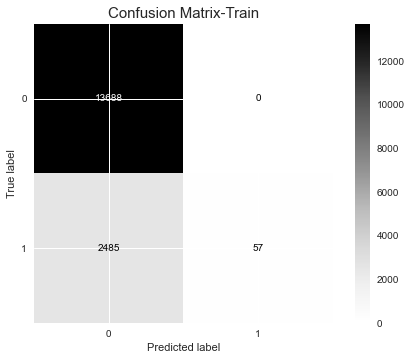


Classification Report-Train :
               precision    recall  f1-score   support

           0       0.85      1.00      0.92     13688
           1       1.00      0.02      0.04      2542

    accuracy                           0.85     16230
   macro avg       0.92      0.51      0.48     16230
weighted avg       0.87      0.85      0.78     16230


Accuracy Score-Train : 0.8468884781269255

AUC Score-Train : 0.7512291889017286





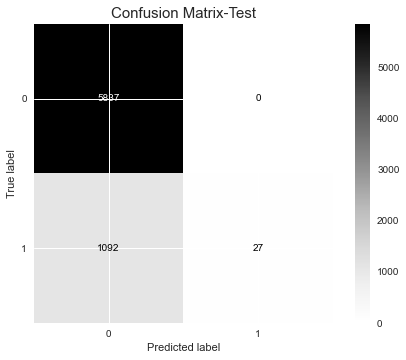


Classification Report-Test :
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      5837
           1       1.00      0.02      0.05      1119

    accuracy                           0.84      6956
   macro avg       0.92      0.51      0.48      6956
weighted avg       0.87      0.84      0.77      6956


Accuracy Score-Test : 0.8430132259919494

AUC Score-Test : 0.7486274043293814



Plot : AUC-ROC Curve


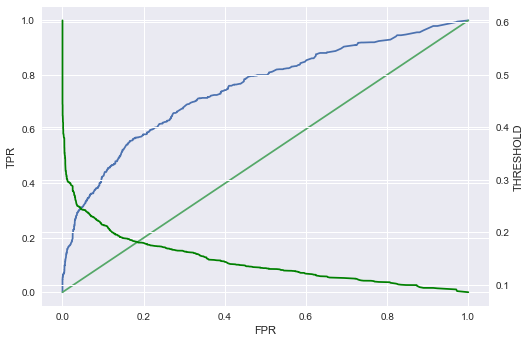

In [40]:
y_train_pred=rfgrid.predict(X_train)
y_train_prob=rfgrid.predict_proba(X_train)[:,1]

y_test_pred=rfgrid.predict(X_test)
y_test_prob=rfgrid.predict_proba(X_test)[:,1]

ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,cmap='Greys')
plt.title('Confusion Matrix-Train',fontdict={'fontsize':15})
plt.show()
print('\nClassification Report-Train :\n',classification_report(y_train,y_train_pred))
print('\nAccuracy Score-Train :',accuracy_score(y_train,y_train_pred))
print('\nAUC Score-Train :',roc_auc_score(y_train,y_train_prob))
print('\n'*2)

ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,cmap='Greys')
plt.title('Confusion Matrix-Test',fontdict={'fontsize':15})
plt.show()
print('\nClassification Report-Test :\n',classification_report(y_test,y_test_pred))
print('\nAccuracy Score-Test :',accuracy_score(y_test,y_test_pred))
print('\nAUC Score-Test :',roc_auc_score(y_test,y_test_prob))

print('\n\n\nPlot : AUC-ROC Curve')
fpr,tpr,threshold= roc_curve(y_test,y_test_prob)
threshold[0]=threshold[0]-1
fig,ax1 = plt.subplots()
ax1.plot(fpr,tpr)
ax1.plot(fpr,fpr)
ax1.set_xlabel('FPR')
ax1.set_ylabel('TPR')
ax2=ax1.twinx()
ax2.plot(fpr,threshold,'-g')
ax2.set_ylabel('THRESHOLD')
plt.show()
plt.show()

## RandomisedSearchCV

In [41]:
rfrandomized=RandomizedSearchCV(estimator=RandomForestClassifier(random_state=10),
                          param_distributions=[{'criterion': ['entropy', 'gini'],
                                'n_estimators': [5,10],
                                'max_depth':[5,10,15],
                                'max_features': ['sqrt', 'log2'],
                                'min_samples_leaf':[10,50,100],
                                'min_samples_split': [20,100,200],
                                'max_leaf_nodes': [5, 8]}],
                          cv=5)

rfrand_fit=rfrandomized.fit(X_train,y_train)

print(rfrand_fit.best_params_)

{'n_estimators': 5, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_leaf_nodes': 8, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'entropy'}


In [42]:
rfrand_score=rfrand_fit.score(X_train,y_train)
rfrand_score

0.8454713493530499

In [43]:
pred=rfrand_fit.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
rfrand_score_test=rfrand_fit.score(X_test,pred)
rfrand_score_test

1.0

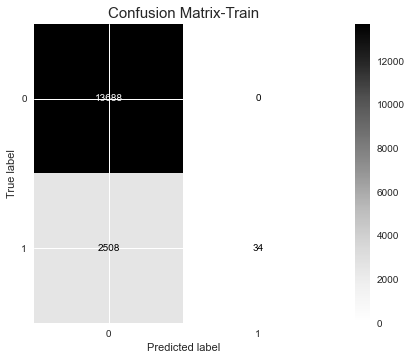


Classification Report-Train :
               precision    recall  f1-score   support

           0       0.85      1.00      0.92     13688
           1       1.00      0.01      0.03      2542

    accuracy                           0.85     16230
   macro avg       0.92      0.51      0.47     16230
weighted avg       0.87      0.85      0.78     16230


Accuracy Score-Train : 0.8454713493530499

AUC Score-Train : 0.7297395428340984





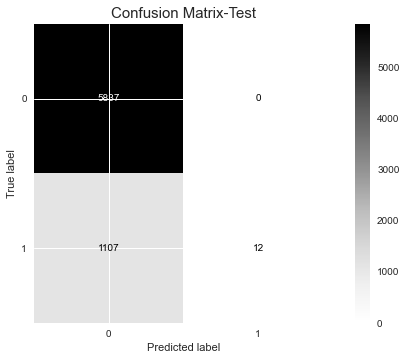


Classification Report-Test :
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      5837
           1       1.00      0.01      0.02      1119

    accuracy                           0.84      6956
   macro avg       0.92      0.51      0.47      6956
weighted avg       0.87      0.84      0.77      6956


Accuracy Score-Test : 0.8408568142610696

AUC Score-Test : 0.7337216453602583



Plot : AUC-ROC Curve


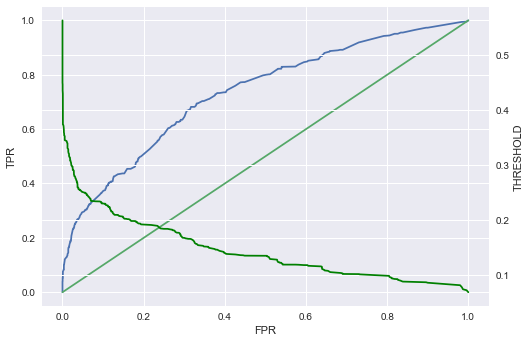

In [45]:
y_train_pred=rfrand_fit.predict(X_train)
y_train_prob=rfrand_fit.predict_proba(X_train)[:,1]

y_test_pred=rfrand_fit.predict(X_test)
y_test_prob=rfrand_fit.predict_proba(X_test)[:,1]

ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,cmap='Greys')
plt.title('Confusion Matrix-Train',fontdict={'fontsize':15})
plt.show()
print('\nClassification Report-Train :\n',classification_report(y_train,y_train_pred))
print('\nAccuracy Score-Train :',accuracy_score(y_train,y_train_pred))
print('\nAUC Score-Train :',roc_auc_score(y_train,y_train_prob))
print('\n'*2)

ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,cmap='Greys')
plt.title('Confusion Matrix-Test',fontdict={'fontsize':15})
plt.show()
print('\nClassification Report-Test :\n',classification_report(y_test,y_test_pred))
print('\nAccuracy Score-Test :',accuracy_score(y_test,y_test_pred))
print('\nAUC Score-Test :',roc_auc_score(y_test,y_test_prob))

print('\n\n\nPlot : AUC-ROC Curve')
fpr,tpr,threshold= roc_curve(y_test,y_test_prob)
threshold[0]=threshold[0]-1
fig,ax1 = plt.subplots()
ax1.plot(fpr,tpr)
ax1.plot(fpr,fpr)
ax1.set_xlabel('FPR')
ax1.set_ylabel('TPR')
ax2=ax1.twinx()
ax2.plot(fpr,threshold,'-g')
ax2.set_ylabel('THRESHOLD')
plt.show()
plt.show()

# Final Model with best Parameters

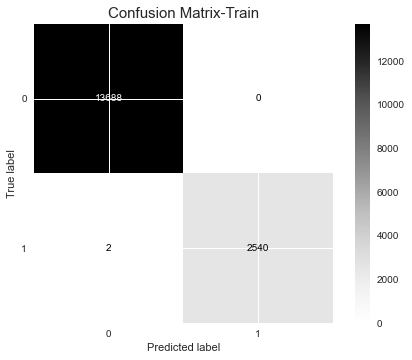


Classification Report-Train :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13688
           1       1.00      1.00      1.00      2542

    accuracy                           1.00     16230
   macro avg       1.00      1.00      1.00     16230
weighted avg       1.00      1.00      1.00     16230


Accuracy Score-Train : 0.9998767714109673

AUC Score-Train : 1.0

f1_score Train: 0.9996064541519087

Precision Train Score : 1.0

Recall Train Score : 0.999213217938631





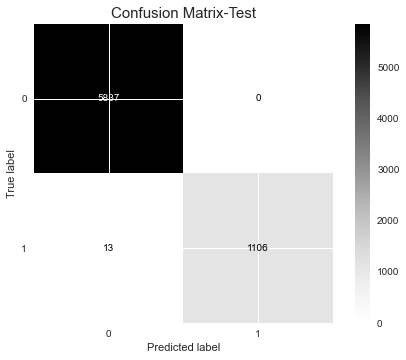


Classification Report-Test :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5837
           1       1.00      0.99      0.99      1119

    accuracy                           1.00      6956
   macro avg       1.00      0.99      1.00      6956
weighted avg       1.00      1.00      1.00      6956


Accuracy Score-Test : 0.9981311098332375

AUC Score-Test : 0.9998718538159774

f1_score Train: 0.9941573033707864

Precision Train Score : 1.0

Recall Train Score : 0.9883824843610366



Plot : AUC-ROC Curve


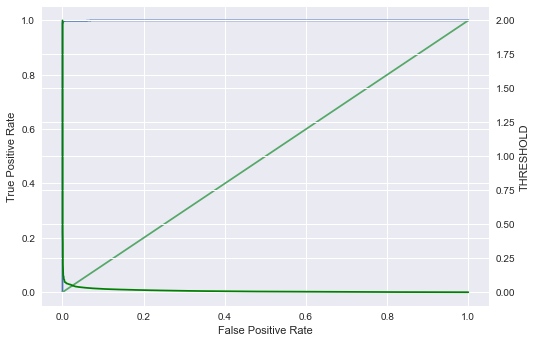

In [46]:
23xgbc=XGBClassifier()
xgbc.fit(X_train,y_train)
y_train_pred=xgbc.predict(X_train)
y_train_prob=xgbc.predict_proba(X_train)[:,1]

y_test_pred=xgbc.predict(X_test)
y_test_prob=xgbc.predict_proba(X_test)[:,1]

ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,cmap='Greys')
plt.title('Confusion Matrix-Train',fontdict={'fontsize':15})
plt.show()
print('\nClassification Report-Train :\n',classification_report(y_train,y_train_pred))
print('\nAccuracy Score-Train :',accuracy_score(y_train,y_train_pred))
print('\nAUC Score-Train :',roc_auc_score(y_train,y_train_prob))
print('\nf1_score Train:',f1_score(y_train,y_train_pred))
print('\nPrecision Train Score :',precision_score(y_train,y_train_pred))
print('\nRecall Train Score :',recall_score(y_train,y_train_pred))


print('\n'*2)

ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,cmap='Greys')
plt.title('Confusion Matrix-Test',fontdict={'fontsize':15})
plt.show()
print('\nClassification Report-Test :\n',classification_report(y_test,y_test_pred))
print('\nAccuracy Score-Test :',accuracy_score(y_test,y_test_pred))
print('\nAUC Score-Test :',roc_auc_score(y_test,y_test_prob))
print('\nf1_score Train:',f1_score(y_test,y_test_pred))
print('\nPrecision Train Score :',precision_score(y_test,y_test_pred))
print('\nRecall Train Score :',recall_score(y_test,y_test_pred))


print('\n\n\nPlot : AUC-ROC Curve') 
fpr,tpr,thresholds= roc_curve(y_test,y_test_prob)
fig,ax1 = plt.subplots()
ax1.plot(fpr,tpr)
ax1.plot(fpr,fpr)
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax2=ax1.twinx()
x2.plot(fpr,thresholds,'-g')
ax2.set_ylabel('THRESHOLD')
plt.show()
plt.show()

## Cross Validation

In [47]:
cross_val = cross_val_score(xgbc,X_train,y_train ,cv = 10,scoring="accuracy")

In [48]:
cross_val

array([0.99753543, 0.99815157, 0.99630314, 0.99445471, 0.99691929,
       0.99938386, 0.99876771, 0.99691929, 0.99691929, 0.995687  ])

In [49]:
cross_val.mean()

0.9971041281577324

In [50]:
cross_val.std()

0.0013791145585704985

In [51]:
print("Accuracy: %0.5f (+/- %0.5f)" % (cross_val.mean(), cross_val.std() * 2))

Accuracy: 0.99710 (+/- 0.00276)


## Final Accuracy of the model:
## Train Accuracy - 99.98% Test Accuracy - 99.81%